In [36]:
import matplotlib.pyplot as plt
import numpy as np 
import math
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.rcParams['svg.fonttype'] = 'none'

(-4, 4)

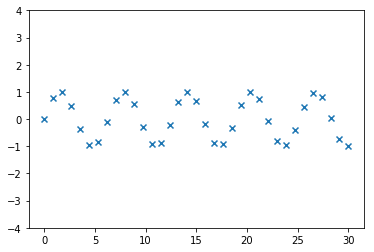

In [37]:
x = np.linspace(0,30,35)
y = np.sin(x)
plt.scatter(x,y,marker='x')
plt.ylim(-4,4)

In [38]:
def ang2rad(angle):
    return math.pi/180*angle
alpha = ang2rad(-28)
rotmat =  np.array([[math.cos(alpha),-math.sin(alpha)],[math.sin(alpha),math.cos(alpha)]])

In [39]:
rotg = np.dot(np.dstack([x,y]),rotmat)
rotx = rotg[0][:,0]
roty = rotg[0][:,1]
# we recalcuate the original value
from scipy import interpolate
f = interpolate.interp1d(rotx, roty,kind='cubic')
newx = x[5:-5]
rotyi = f(newx)   # use interpolation function returned by `interp1d`

In [40]:
from scipy.linalg import lstsq
A = np.vstack([newx, np.ones(len(newx))]).T
m, c = np.linalg.lstsq(A, rotyi, rcond=None)[0]
fittedy = newx*m + c


(3.123145352101605, 26.876854647898387, -2.139559719196056, 14.456906042863736)

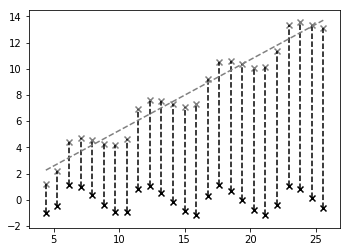

In [41]:
sub = rotyi - fittedy
plt.scatter(newx,rotyi,marker='x',color='gray')
plt.plot(newx,fittedy,linestyle='--',color='gray')
plt.scatter(newx,sub,marker='x',color='black')
for i in range(len(rotyi)):
    plt.vlines(ymin=sub[i],ymax=rotyi[i],x=newx[i],linestyle='--')
plt.ylim(-4,12)
plt.axis('scaled')

In [42]:
xin= np.arctan((fittedy[10]-fittedy[0])/(newx[10]-newx[0]))/np.pi*180
print(xin)

28.38507377767664


In [43]:
alpha = ang2rad(25)
rotmat2 =  np.array([[math.cos(alpha),-math.sin(alpha)],[math.sin(alpha),math.cos(alpha)]])
rotgn = np.dot(np.dstack([newx,rotyi]),rotmat2)

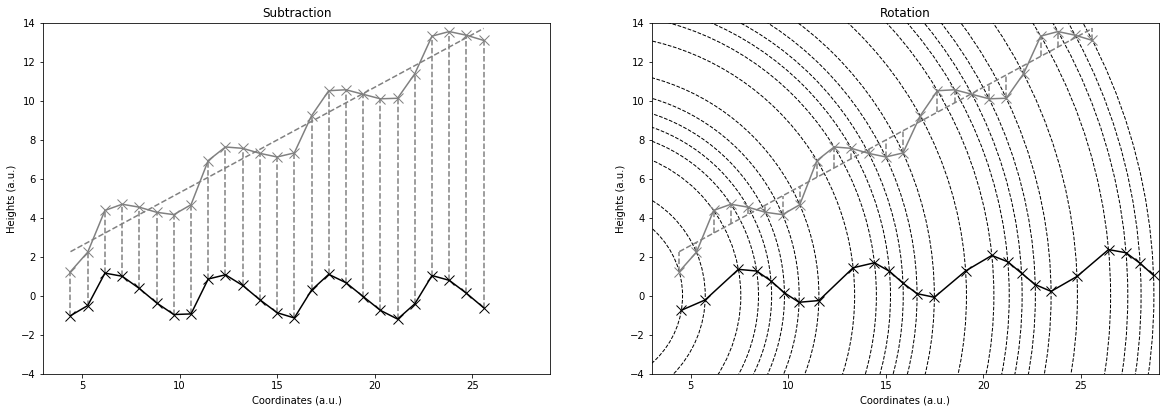

In [44]:
fig = plt.figure(figsize=(20,10))
ax0 = fig.add_subplot(121)
ms = 10
ax0.plot(newx,rotyi,marker='x',color='gray',markersize= ms)
ax0.plot(newx,fittedy,linestyle='--',color='gray')
ax0.plot(newx,sub,marker='x',color='black',markersize= ms)
for i in range(len(rotyi)):
    ax0.vlines(ymin=sub[i],ymax=rotyi[i],x=newx[i],linestyle='--',color='gray')
ax0.set_ylim(-4,14)
ax0.set_xlim(3,29)
ax0.set_aspect(1)
ax0.set_xlabel("Coordinates (a.u.)")
ax0.set_ylabel("Heights (a.u.)")
ax0.set_title("Subtraction")

ax = fig.add_subplot(122)
ax.plot(newx,rotyi,marker='x',color='gray',markersize= ms)
ax.plot(newx,fittedy,linestyle='--',color='gray')
ax.plot(rotgn[0][:,0],rotgn[0][:,1],marker='x',color='black',markersize= ms)
for i in range(len(rotyi)):
    r = (newx[i]*newx[i] + rotyi[i]*rotyi[i])**0.5
    circle = plt.Circle((0, 0), r, fill=False,linestyle='--')
    ax.add_artist(circle)
    if rotyi[i] > fittedy[i]:
        ymax = rotyi[i]
        ymin = fittedy[i]
    if rotyi[i] < fittedy[i]:
        ymin = rotyi[i]
        ymax = fittedy[i]
    ax.vlines(ymin=ymin,ymax=ymax,x=newx[i],linestyle='--',color='gray')
ax.set_ylim(-4,14)
ax.set_xlim(3,29)
ax.set_aspect(1)
ax.set_xlabel("Coordinates (a.u.)")
ax.set_ylabel("Heights (a.u.)")
ax.set_title("Rotation")
fig.savefig("subrot.svg")

In [45]:
x = np.linspace(0,120,440)
y = np.sin(x)
def generate_tiltedsurface(x,y,angle):
    def ang2rad(angle):
        return math.pi/180*angle
    alpha = ang2rad(angle)
    rotmat =  np.array([[math.cos(alpha),-math.sin(alpha)],[math.sin(alpha),math.cos(alpha)]])
    rotg = np.dot(np.dstack([x,y]),rotmat)
    rotx = rotg[0][:,0]
    roty = rotg[0][:,1]
    # we recalcuate the original value
    f = interpolate.interp1d(rotx, roty)
    newx = x[170:-170]
    rotyi = f(newx)
    return newx,rotyi

(45.11617312072893, 74.88382687927107, -89.60997443591666, 5.309533240196736)

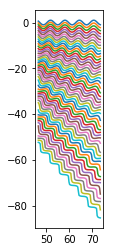

In [46]:
for i in range(0,50,1):
    xg,yg = generate_tiltedsurface(x,y,i)
    plt.plot(xg,yg)
plt.axis('scaled')

In [47]:
def fitt(newx,rotyi):
    A = np.vstack([newx, np.ones(len(newx))]).T
    m, c = np.linalg.lstsq(A, rotyi, rcond=None)[0]
    fittedy = newx*m + c
    return fittedy

In [48]:
def rotate(newx,newy,fittedy,angle=None):
    if angle == None:
        alpha= np.arctan((fittedy[30]-fittedy[0])/(newx[30]-newx[0]))
    else:
        alpha = ang2rad(angle)
    rotmat2 =  np.array([[math.cos(alpha),-math.sin(alpha)],[math.sin(alpha),math.cos(alpha)]])
    rotgn = np.dot(np.dstack([newx,newy]),rotmat2)
    rotx = rotgn[0][:,0]
    roty = rotgn[0][:,1]
    return rotx,roty,alpha/np.pi*180

In [49]:
from scipy.signal import find_peaks
from scipy.stats import skew,kurtosis
def computemetrology(x,y):
    peaks, _ = find_peaks(y, height=0)
    RSm = np.average(np.diff(x[peaks]))
    Rq = np.std(y)
    Ra = np.mean(abs(y))
    Rt = np.max(y)-np.min(y)
    Rsk = skew(y)
    Rku = kurtosis(y,fisher=False)
    return RSm,Rq,Ra,Rt,Rsk,Rku

In [50]:
rot = []
sub = []
for angle in range(0,50,1):
    xg,yg = generate_tiltedsurface(x,y,angle)
    # fitt a line to the tilted surface
    fittedy = fitt(xg,yg)
    # subtract the values of the line to the values of the tilted surface
    subi = yg - fittedy
    # rotate the titlted surface
    rotx,roty,alpha = rotate(xg,yg,fittedy,-angle)
    rot.append(computemetrology(rotx,roty))
    sub.append(computemetrology(xg,subi))
sub = np.array(sub)
rot = np.array(rot)

Text(0.5, 0, 'Angle (°)')

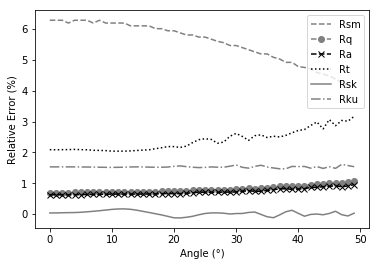

In [16]:
plt.plot(range(0,50,1),sub[:,0],label= "Rsm",linestyle='--',color='gray')
plt.plot(range(0,50,1),sub[:,1],label= "Rq",linestyle='--',color='gray',marker='o')
plt.plot(range(0,50,1),sub[:,2],label= "Ra",linestyle='--',marker='x',color='black')
plt.plot(range(0,50,1),sub[:,3],label= "Rt",linestyle=':',color='black')
plt.plot(range(0,50,1),sub[:,4],label= "Rsk",linestyle='-',color='gray')
plt.plot(range(0,50,1),sub[:,5],label= "Rku",linestyle='-.',color='gray')
plt.legend()
plt.ylabel("Relative Error (%)")
plt.xlabel("Angle (°)")

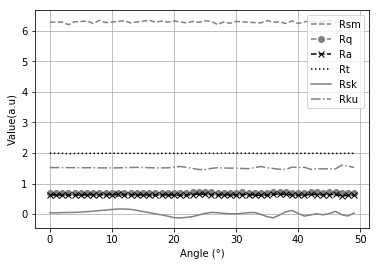

In [17]:
plt.plot(range(0,50,1),rot[:,0] ,label= "Rsm",linestyle='--',color='gray')
plt.plot(range(0,50,1),rot[:,1],label= "Rq",linestyle='--',color='gray',marker='o')
plt.plot(range(0,50,1),rot[:,2],label= "Ra",linestyle='--',marker='x',color='black')
plt.plot(range(0,50,1),rot[:,3],label= "Rt",linestyle=':',color='black')
plt.plot(range(0,50,1),rot[:,4],label= "Rsk",linestyle='-',color='gray')
plt.plot(range(0,50,1),rot[:,5],label= "Rku",linestyle='-.',color='gray')
plt.legend()

plt.ylabel("Value(a.u)")
plt.xlabel("Angle (°)")
plt.grid()

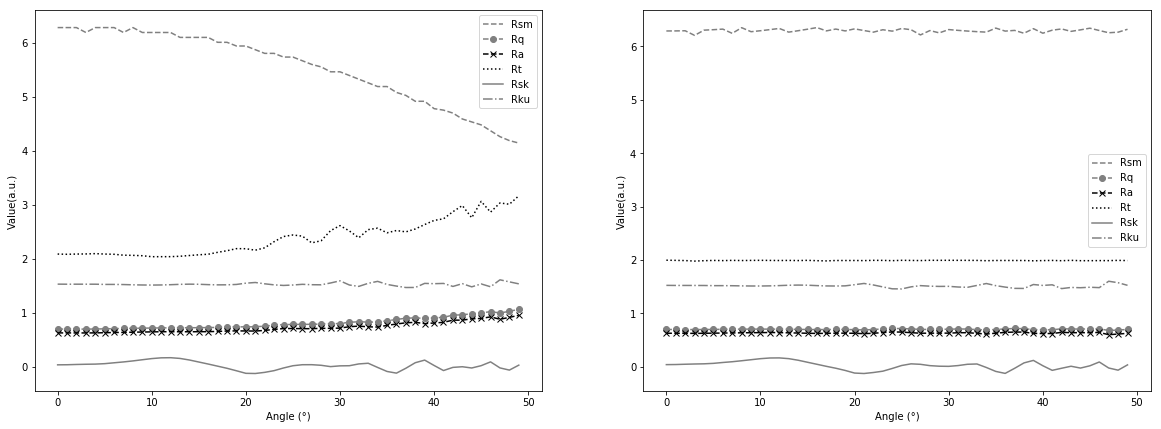

In [18]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.plot(range(0,50,1),sub[:,0],label= "Rsm",linestyle='--',color='gray')
ax.plot(range(0,50,1),sub[:,1],label= "Rq",linestyle='--',color='gray',marker='o')
ax.plot(range(0,50,1),sub[:,2],label= "Ra",linestyle='--',marker='x',color='black')
ax.plot(range(0,50,1),sub[:,3],label= "Rt",linestyle=':',color='black')
ax.plot(range(0,50,1),sub[:,4],label= "Rsk",linestyle='-',color='gray')
ax.plot(range(0,50,1),sub[:,5],label= "Rku",linestyle='-.',color='gray')
ax.legend()
ax.set_ylabel("Value(a.u.)")
ax.set_xlabel("Angle (°)")

ax2 = fig.add_subplot(122)
ax2.plot(range(0,50,1),rot[:,0] ,label= "Rsm",linestyle='--',color='gray')
ax2.plot(range(0,50,1),rot[:,1],label= "Rq",linestyle='--',color='gray',marker='o')
ax2.plot(range(0,50,1),rot[:,2],label= "Ra",linestyle='--',marker='x',color='black')
ax2.plot(range(0,50,1),rot[:,3],label= "Rt",linestyle=':',color='black')
ax2.plot(range(0,50,1),rot[:,4],label= "Rsk",linestyle='-',color='gray')
ax2.plot(range(0,50,1),rot[:,5],label= "Rku",linestyle='-.',color='gray')
ax2.legend()

ax2.set_ylabel("Value(a.u.)")
ax2.set_xlabel("Angle (°)")
fig.savefig('RotSubparm.svg')

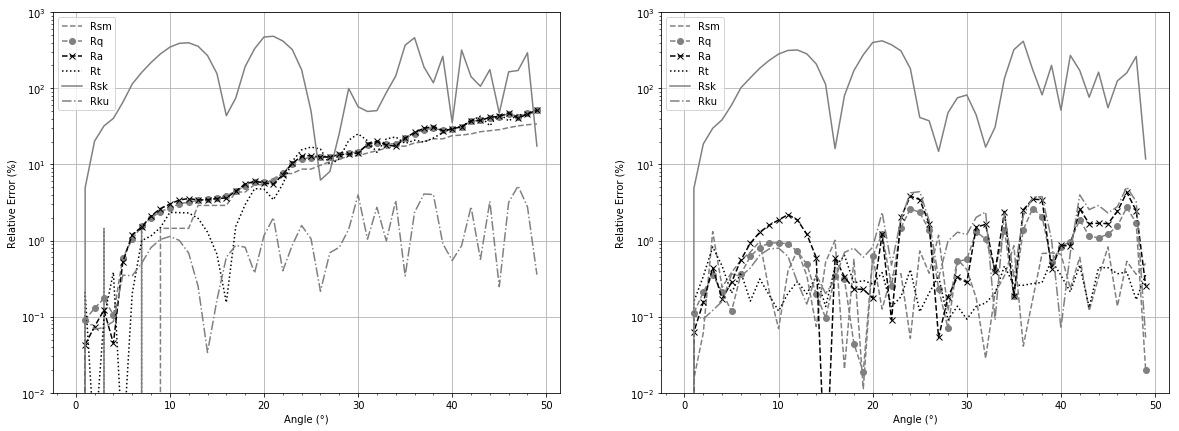

In [19]:

fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.plot(range(0,50,1),abs(sub[:,0] - sub[0,0])/sub[0,0]*100,label= "Rsm",linestyle='--',color='gray')
ax.plot(range(0,50,1),abs(sub[:,1] - sub[0,1])/sub[0,1]*100,label= "Rq",linestyle='--',color='gray',marker='o')
ax.plot(range(0,50,1),abs(sub[:,2] - sub[0,2])/sub[0,2]*100,label= "Ra",linestyle='--',marker='x',color='black')
ax.plot(range(0,50,1),abs(sub[:,3] - sub[0,3])/sub[0,3]*100,label= "Rt",linestyle=':',color='black')
ax.plot(range(0,50,1),abs(sub[:,4] - sub[0,4])/sub[0,4]*100,label= "Rsk",linestyle='-',color='gray')
ax.plot(range(0,50,1),abs(sub[:,5] - sub[0,5])/sub[0,5]*100,label= "Rku",linestyle='-.',color='gray')
ax.legend()

ax.semilogy()
ax.set_ylim((10**-2,10**3))
ax.set_ylabel("Relative Error (%)")
ax.set_xlabel("Angle (°)")
ax.grid()

ax2 = fig.add_subplot(122)
ax2.plot(range(0,50,1),abs(rot[:,0] - rot[0,0])/rot[0,0]*100,label= "Rsm",linestyle='--',color='gray')
ax2.plot(range(0,50,1),abs(rot[:,1] - rot[0,1])/rot[0,1]*100,label= "Rq",linestyle='--',color='gray',marker='o')
ax2.plot(range(0,50,1),abs(rot[:,2] - rot[0,2])/rot[0,2]*100,label= "Ra",linestyle='--',marker='x',color='black')
ax2.plot(range(0,50,1),abs(rot[:,3] - rot[0,3])/rot[0,3]*100,label= "Rt",linestyle=':',color='black')
ax2.plot(range(0,50,1),abs(rot[:,4] - rot[0,4])/rot[0,4]*100,label= "Rsk",linestyle='-',color='gray')
ax2.plot(range(0,50,1),abs(rot[:,5] - rot[0,5])/rot[0,5]*100,label= "Rku",linestyle='-.',color='gray')
ax2.legend()

ax2.set_ylabel("Relative Error (%)")
ax2.semilogy()
ax2.set_ylim((10**-2,10**3))
ax2.set_xlabel("Angle (°)")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())

ax2.grid()
fig.savefig("Rotsubrelerro.svg")

# Error when determining the angle
Unfortunatly, we don't know the rotation angle hence we have to determine it from the fitting.

In [20]:
rot = []
sub = []
error = []
for angle in range(0,50,1):
    xg,yg = generate_tiltedsurface(x,y,angle)
    fittedy = fitt(xg,yg)
    subi = yg - fittedy
    rotx,roty,alpha = rotate(xg,yg,fittedy,None)
    error.append(alpha - angle)
    rot.append(computemetrology(rotx,roty))
    sub.append(computemetrology(xg,subi))
sub = np.array(sub)
rot = np.array(rot)

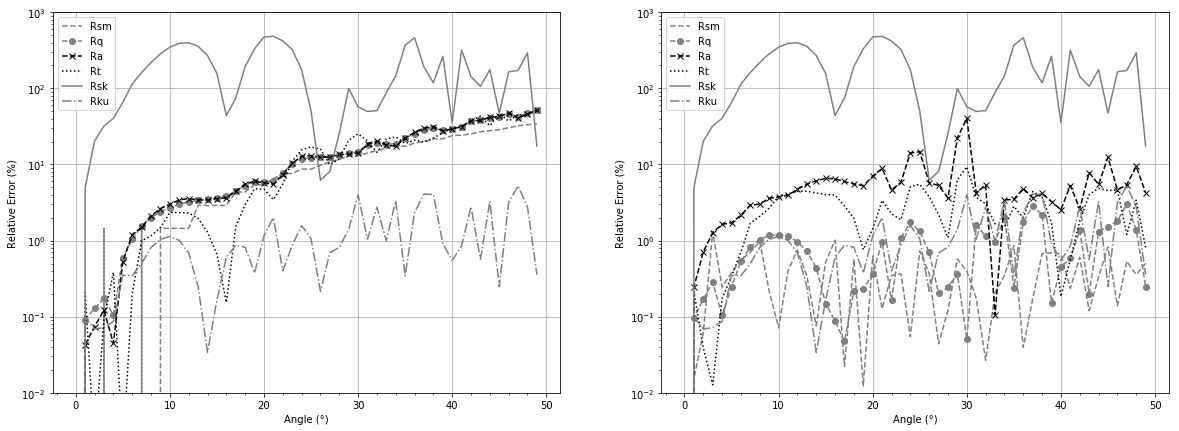

In [21]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.plot(range(0,50,1),abs(sub[:,0] - sub[0,0])/sub[0,0]*100,label= "Rsm",linestyle='--',color='gray')
ax.plot(range(0,50,1),abs(sub[:,1] - sub[0,1])/sub[0,1]*100,label= "Rq",linestyle='--',color='gray',marker='o')
ax.plot(range(0,50,1),abs(sub[:,2] - sub[0,2])/sub[0,2]*100,label= "Ra",linestyle='--',marker='x',color='black')
ax.plot(range(0,50,1),abs(sub[:,3] - sub[0,3])/sub[0,3]*100,label= "Rt",linestyle=':',color='black')
ax.plot(range(0,50,1),abs(sub[:,4] - sub[0,4])/sub[0,4]*100,label= "Rsk",linestyle='-',color='gray')
ax.plot(range(0,50,1),abs(sub[:,5] - sub[0,5])/sub[0,5]*100,label= "Rku",linestyle='-.',color='gray')
ax.legend()

ax.semilogy()
ax.set_ylim((10**-2,10**3))
ax.set_ylabel("Relative Error (%)")
ax.set_xlabel("Angle (°)")
ax.grid()

ax2 = fig.add_subplot(122)
ax2.plot(range(0,50,1),abs(rot[:,0] - rot[0,0])/rot[0,0]*100,label= "Rsm",linestyle='--',color='gray')
ax2.plot(range(0,50,1),abs(rot[:,1] - rot[0,1])/rot[0,1]*100,label= "Rq",linestyle='--',color='gray',marker='o')
ax2.plot(range(0,50,1),abs(rot[:,2] - rot[0,2])/rot[0,2]*100,label= "Ra",linestyle='--',marker='x',color='black')
ax2.plot(range(0,50,1),abs(rot[:,3] - rot[0,3])/rot[0,3]*100,label= "Rt",linestyle=':',color='black')
ax2.plot(range(0,50,1),abs(rot[:,4] - rot[0,4])/rot[0,4]*100,label= "Rsk",linestyle='-',color='gray')
ax2.plot(range(0,50,1),abs(rot[:,5] - rot[0,5])/rot[0,5]*100,label= "Rku",linestyle='-.',color='gray')
ax2.legend()

ax2.set_ylabel("Relative Error (%)")
ax2.semilogy()
ax2.set_ylim((10**-2,10**3))
ax2.set_xlabel("Angle (°)")
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax2.xaxis.set_minor_locator(AutoMinorLocator())

ax2.grid()
#fig.savefig("Rotsubrelerro.svg")

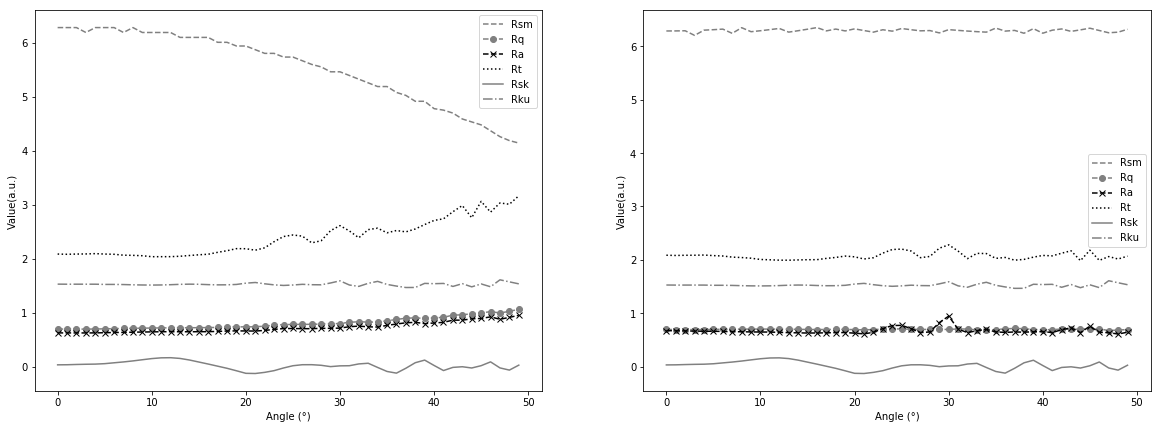

In [22]:
fig = plt.figure(figsize=(20,7))
ax = fig.add_subplot(121)
ax.plot(range(0,50,1),sub[:,0],label= "Rsm",linestyle='--',color='gray')
ax.plot(range(0,50,1),sub[:,1],label= "Rq",linestyle='--',color='gray',marker='o')
ax.plot(range(0,50,1),sub[:,2],label= "Ra",linestyle='--',marker='x',color='black')
ax.plot(range(0,50,1),sub[:,3],label= "Rt",linestyle=':',color='black')
ax.plot(range(0,50,1),sub[:,4],label= "Rsk",linestyle='-',color='gray')
ax.plot(range(0,50,1),sub[:,5],label= "Rku",linestyle='-.',color='gray')
ax.legend()
ax.set_ylabel("Value(a.u.)")
ax.set_xlabel("Angle (°)")

ax2 = fig.add_subplot(122)
ax2.plot(range(0,50,1),rot[:,0] ,label= "Rsm",linestyle='--',color='gray')
ax2.plot(range(0,50,1),rot[:,1],label= "Rq",linestyle='--',color='gray',marker='o')
ax2.plot(range(0,50,1),rot[:,2],label= "Ra",linestyle='--',marker='x',color='black')
ax2.plot(range(0,50,1),rot[:,3],label= "Rt",linestyle=':',color='black')
ax2.plot(range(0,50,1),rot[:,4],label= "Rsk",linestyle='-',color='gray')
ax2.plot(range(0,50,1),rot[:,5],label= "Rku",linestyle='-.',color='gray')
ax2.legend()

ax2.set_ylabel("Value(a.u.)")
ax2.set_xlabel("Angle (°)")
fig.savefig('RotSubparm.svg')

In [28]:
x, y = np.meshgrid(
            np.arange(
                0, 100, 1), np.arange(
                0, 100, 1))
m1 = 0.2
m2 =  0.5
m3 = 0.4
m4= 3
m5= 3
q = 10
Z=m1*y**2+m2*x**2+m3*x*y+m4*y+m5*x+q

In [30]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [37]:
@interact(m1 = 0.2,m2 =  0.5,m3 = 0.4,m4= 3,m5= 3,q = 10)
def tredplot(m1,m2 ,m3 ,m4,m5,q):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    # Plot the surface.
    Z=m1*y**2+m2*x**2+m3*x*y+m4*y+m5*x+q
    surf = ax.plot_surface(x, y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-4000, 8000)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

interactive(children=(FloatSlider(value=0.2, description='m1', max=0.6000000000000001, min=-0.2), FloatSlider(…